In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.a2c import A2C
from networks.a2c.actor import Actor
from networks.a2c.critic import Critic

import matplotlib.pyplot as plt
import torch

norm_cols = ['Volume XRP']
cols = ['date'] + ['open', 'high', 'low', 'close', f'Volume XRP']
batch_dur = 30
n_features = 6

env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-02-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)

actor_model = Actor(
    state_dim=batch_dur*n_features+3,
    action_dim=3,
)
critic_model = Critic(state_dim=batch_dur*n_features+3)
a2c = A2C(
    env=env, 
    actor=actor_model,
    critic=critic_model,
    n_actns=3,
    actor_optmz=torch.optim.Adam(actor_model.parameters(), lr=0.0008),
    critic_optmz=torch.optim.Adam(critic_model.parameters(), lr=0.0005),
    hyprprms={
        'gamma': 0.9995,
    },
    log_freq=1,
    mdl_pth='../models/a2c_nn_3',
    load_models=False,
)

In [2]:
a2c.run(1000)


Ep: 0 | TS: 59970 | L: 5.969 | R: 3.57 | P: 41.14 | R.Avg P: 41.14 | NW: 141.14 | R.Avg NW: 141.14 | R.U: 299
Ep: 1 | TS: 119940 | L: 4.656 | R: -24.98 | P: -3.74 | R.Avg P: 18.7 | NW: 96.26 | R.Avg NW: 118.7 | R.U: 238
Ep: 2 | TS: 179910 | L: 2.908 | R: -8.04 | P: 27.74 | R.Avg P: 21.71 | NW: 127.74 | R.Avg NW: 121.71 | R.U: 235
Ep: 3 | TS: 239880 | L: 1.689 | R: -11.19 | P: 22.0 | R.Avg P: 21.78 | NW: 122.0 | R.Avg NW: 121.78 | R.U: 226
Ep: 4 | TS: 299850 | L: 0.944 | R: -14.26 | P: 17.92 | R.Avg P: 21.01 | NW: 117.92 | R.Avg NW: 121.01 | R.U: 216
Ep: 5 | TS: 359820 | L: 0.714 | R: -2.52 | P: 49.88 | R.Avg P: 25.82 | NW: 149.88 | R.Avg NW: 125.82 | R.U: 217
Ep: 6 | TS: 419790 | L: 0.987 | R: 10.57 | P: 81.13 | R.Avg P: 33.72 | NW: 181.13 | R.Avg NW: 133.72 | R.U: 228
Ep: 7 | TS: 479760 | L: 0.895 | R: 0.1 | P: 50.33 | R.Avg P: 35.8 | NW: 150.33 | R.Avg NW: 135.8 | R.U: 231
Ep: 8 | TS: 539730 | L: 0.79 | R: -5.01 | P: 31.36 | R.Avg P: 35.31 | NW: 131.36 | R.Avg NW: 135.31 | R.U: 232


KeyboardInterrupt: 

/home/vinaykudari/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/vinaykudari/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


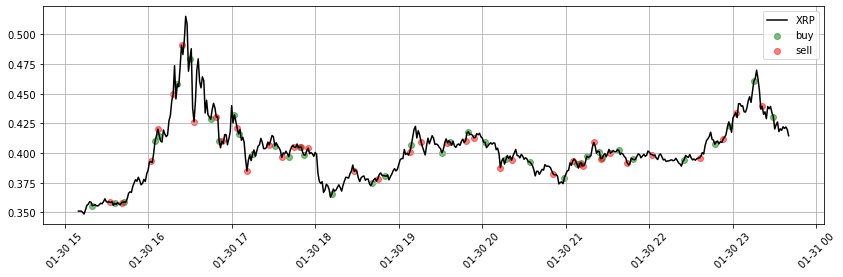

Avg.Rewards: -23.14 | Max.Profit: 33.9 | Avg.Profit: 16.05 | Avg.Units: 152 


In [4]:
rewards, profits, actions = a2c.evaluate(start_dt='2021-01-30 15:15', duration=500, show_pred=False)

/home/vinaykudari/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/vinaykudari/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


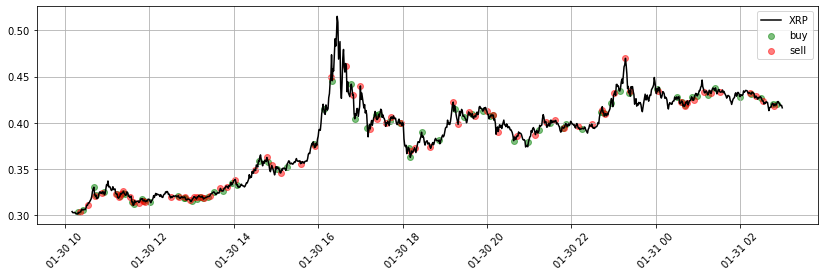

Avg.Rewards: -26.29 | Max.Profit: 49.45 | Avg.Profit: 22.63 | Avg.Units: 148 


In [13]:
rewards, profits, actions = a2c.evaluate(start_dt='2021-01-30 10:15', duration=1000, show_pred=False)

/home/vinaykudari/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/vinaykudari/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


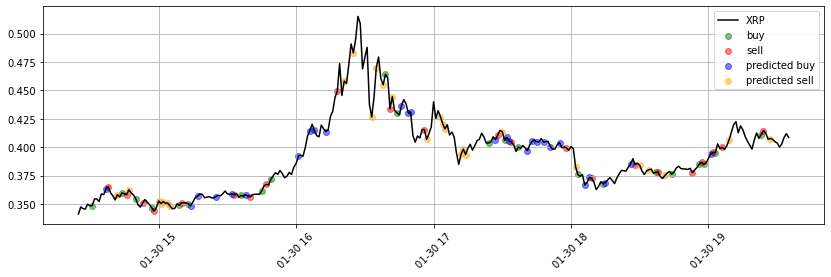

Avg.Rewards: -25.9 | Max.Profit: 28.81 | Avg.Profit: 16.03 | Avg.Units: 148 


In [27]:
rewards, profits, actions = a2c.evaluate(start_dt='2021-01-30 14:30', duration=300, show_pred=True)

## Visualizations

### Training 

Text(0.5, 1.0, 'Rolling avg balance per episode')

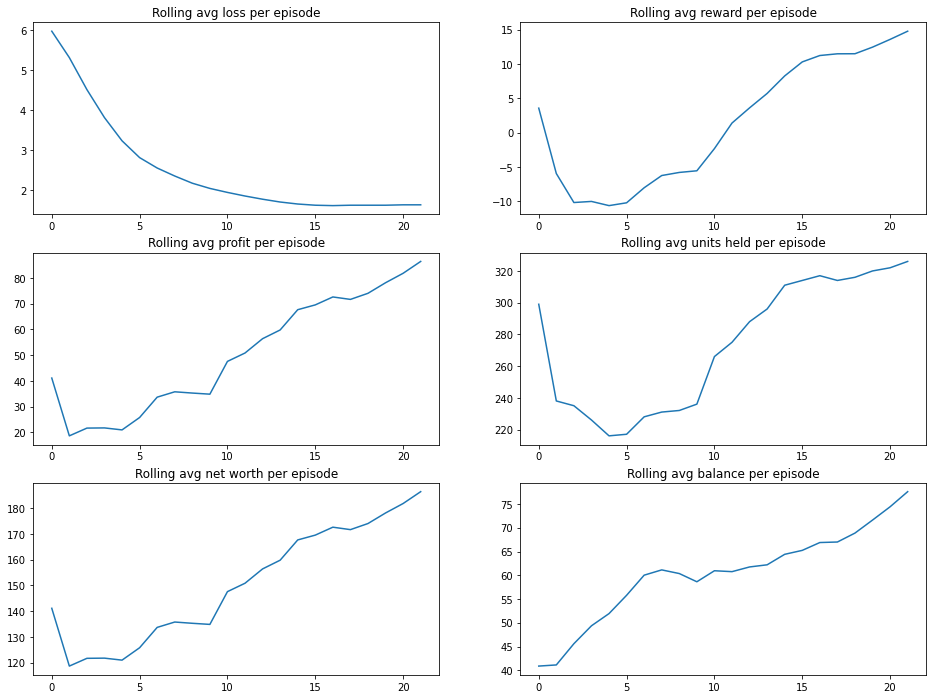

In [3]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in a2c.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')

In [28]:
# torch.save(a2c.actor.state_dict(), '../models/a2c_nn_rsi2/actor')
# torch.save(a2c.critic.state_dict(), '../models/a2c_nn_rsi2/critic')

In [29]:
# import pickle
# with open("../pickles/a2c_logs_final.pickle","wb") as f:
#     temp = dict(a2c.logs)
#     pickle.dump(temp, f, pickle.HIGHEST_PROTOCOL)